# Problem Statement - What are the features of a car that affects its price the most

## "The goal is to turn data into information and information into insight”

## Step - 1 Data Overview

**Objectives**

To get insights of data using pandas library

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings("ignore")# to ignore warnings

sns.set_style("whitegrid")
%matplotlib inline

In [2]:
# Importing the dataset
df = pd.read_csv("auto.csv")

# To display all columns 
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
# Currently the dataset does not have headers. Lets give headings to each column in the dataset

# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

# set headers list
df.columns = headers

### Displaying first ten and last ten rows of the dataset

In [5]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [6]:
df.tail(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
194,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3034,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
195,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2935,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
196,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
197,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,56.2,3045,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
198,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3157,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
203,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


### Understanding raw data

1. symboling: -3, -2, -1, 0, 1, 2, 3.

2. normalized-losses: continuous from 65 to 256.

3. make:alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo


4. fuel-type: diesel, gas.

5. aspiration: std, turbo.

6. num-of-doors: four, two.

7. body-style: hardtop, wagon, sedan, hatchback, convertible.

8. drive-wheels: 4wd, fwd, rwd.

9. engine-location: front, rear.

10. wheel-base: continuous from 86.6 120.9.

11. length: continuous from 141.1 to 208.1.

12. width: continuous from 60.3 to 72.3.

13. height: continuous from 47.8 to 59.8.

14. curb-weight: continuous from 1488 to 4066.

15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.

16. num-of-cylinders: eight, five, four, six, three, twelve, two.

17. engine-size: continuous from 61 to 326.

18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.

19. bore: continuous from 2.54 to 3.94.

20. stroke: continuous from 2.07 to 4.17.

21. compression-ratio: continuous from 7 to 23.

22. horsepower: continuous from 48 to 288.

23. peak-rpm: continuous from 4150 to 6600.

24. city-mpg: continuous from 13 to 49.

25. highway-mpg: continuous from 16 to 54.

26. price: continuous from 5118 to 45400.
**-------------------------------------------------------------------------------------------------**

26th Attribute is the price column. This will be our target column. This means price is the value we want to predict from the dataset and rest 25 attributes will act as the predictor.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

## Step - 2 Data Wrangling
Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


**Objectives**

1. Handle Missing Data
2. Correct Data Format
3. Standardize and normalize data

### Identify and handle missing values

In [8]:
# In this car dataset, missing values comes with a question mark '?'. We replace '?' with NaN throughout the dataset
df.replace('?', np.nan, inplace=True)
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


### Evaluating for missing data

In [9]:
# Check the no. of missing data in each column in our car dataset
df.isnull().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Based on above summary we have 7 columns with missing data

1. normalized-losses - 40 missing values
2. num-of-doors      -  2 missing values
3. bore              -  4 missing values
4. stroke            -  4 missing values
5. horsepower        -  2 missing values
6. peak-rpm          -  2 missing values
7. price             -  4 missing values

### Dealing with missing data

While dealing with missing data we have two options. Either drop the missing data or replacing the missing data

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 40 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

### Calculate mean value for normalized-losses column

In [10]:
avg_normloss = df["normalized-losses"].astype("float").mean(axis=0)
print("Mean of normalized-losses = ", avg_normloss)

Mean of normalized-losses =  122.0


### Replace "NaN" with mean in normalized-losses column

In [11]:
df.replace(np.nan, avg_normloss, inplace=True)

### Replace "NaN" with mean in stroke column

In [12]:
df.replace(np.nan, df["stroke"].astype("float").mean(axis=0), inplace=True)

### Replace "NaN" with mean in bore column

In [13]:
df.replace(np.nan, df["bore"].astype("float").mean(axis=0), inplace=True)

### Replace "NaN" with mean in horse-power column

In [14]:
df.replace(np.nan, df["horsepower"].astype("float").mean(axis=0), inplace=True)

### Replace "NaN" with mean in peak-rpm column

In [15]:
df.replace(np.nan, df["peak-rpm"].astype("float").mean(axis=0), inplace=True)

### Replace "NaN" with most frequent value in num-of-doors column

In [16]:
# To see which values are present in a particular column, we can use the ".value_counts()" method:
df["num-of-doors"].value_counts()

four     114
two       88
122.0      2
Name: num-of-doors, dtype: int64

In [17]:
df["num-of-doors"].replace(122.0, "four", inplace=True)

In [18]:
# To get the occurence of most common value we can also use idxmax()
df["num-of-doors"].value_counts().idxmax()

'four'

In [19]:
# Replace "NaN" with "four" in num-of-doors column
df["num-of-doors"].replace(np.nan, "four", inplace=True)

### Drop the rows with "NaN" values in price column


In [20]:
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [21]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now we have a dataset with no missing values. **Great !!**

### Correct data format

In pandas we check the datatype of each column using **dtypes()** and change the datatype using **astype()**

In [22]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.</p> 


### Convert data types to proper format

In [23]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [24]:
# Let us list the columns after conversion
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Now we have finally obtained cleaned dataset with no missing values and proper format. **Wonderful !!**

### Data Standardization
<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>

<p>The formula for unit conversion is:<p>
L/100km = 235 / mpg
<p>We can do many mathematical operations directly in Pandas.</p>


In [25]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km'] = 235/df["highway-mpg"]

In [26]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462


In [27]:
# Dropping "city-mpg" and "highway-mpg" column
df.drop('city-mpg', axis=1, inplace=True)
df.drop('highway-mpg', axis=1, inplace=True)

In [28]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462


### Data Normalization
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>

In [29]:
df["length"] = df["length"]/df["length"].max()
df["width"] = df["width"]/df["width"].max()
df["height"] = df["height"]/df["height"].max()

In [30]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.886584,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.905947,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462


<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 60 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>

In [31]:
# Converting data type of horsepower column from object to int
df["horsepower"] = df["horsepower"].astype("int")
print(df["horsepower"].nunique(), df["horsepower"].min(), df["horsepower"].max())

60 48 288


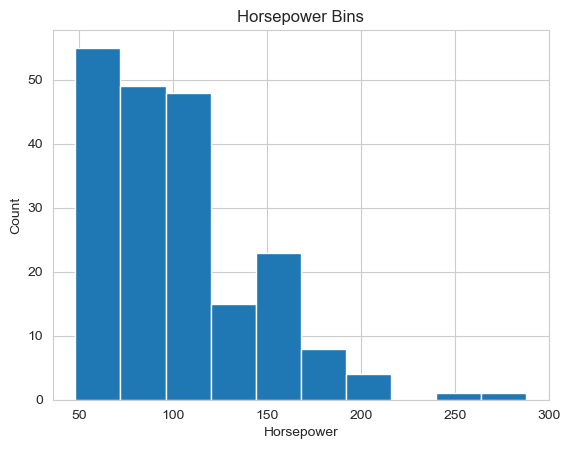

In [32]:
# Plotting histogram of horsepower to see what the graph looks like

plt.hist(df["horsepower"])
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.title("Horsepower Bins")
plt.show()

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated)</code> function.</p>
<p>Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.</p>

In [33]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48., 128., 208., 288.])

In [34]:
group_names = ['Low', 'Medium', 'High']

In [35]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,154,Medium
2,102,Low
3,115,Low
4,110,Low
5,110,Low
6,110,Low
7,140,Medium
8,160,Medium
9,101,Low


In [36]:
# Lets see the no. of vehicles in each bins
df["horsepower-binned"].value_counts()

Low       162
Medium     40
High        2
Name: horsepower-binned, dtype: int64

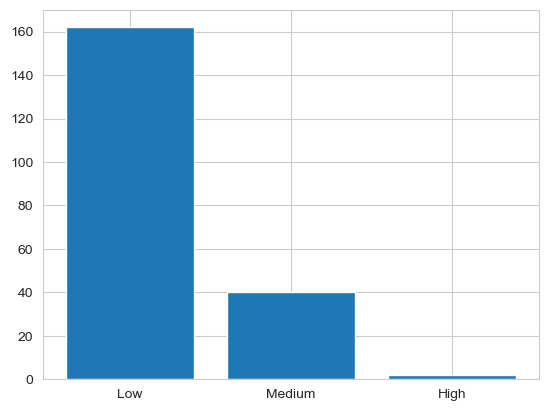

In [37]:
# Lets plot the distribution of each bins
plt.bar(group_names, df["horsepower-binned"].value_counts())
plt.show()

We successfully narrowed down the intervals from 60 to 3

## Bins Visualization
Normally, a histogram is used to visualize the distribution of bins we created above. 

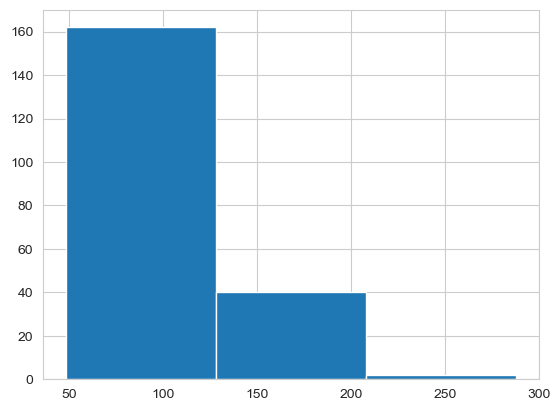

In [38]:
plt.hist(df["horsepower"], bins=3)
plt.show()

Plot above shows the binning result for the attribute "horsepower"

<h3 id="indicator">Indicator Variable (or Dummy Variable)</h3>

<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.
</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>

In [39]:
dummy_variable1 = pd.get_dummies(df["fuel-type"])
dummy_variable1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [40]:
# Changing the column names for more clarity
dummy_variable1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [41]:
# Merge dataframe 'df' and 'dummy_variable'
df = pd.concat([df, dummy_variable1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [42]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.886584,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,16500.0,11.190476,8.703704,Low,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.905947,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,16500.0,12.368421,9.038462,Medium,0,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.915629,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,13950.0,9.791667,7.833333,Low,0,1
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.918396,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,17450.0,13.055556,10.681818,Low,0,1
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,0.917012,0.887960,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500.0,15250.0,12.368421,9.400000,Low,0,1


In [43]:
# Similarly creating dummy variable for column 'aspiration'
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [44]:
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

Finally our data wrangling step is complete and we have a cleaner dataframe with some modifications.
We will save this dataframe for future use

In [45]:
df.to_csv("clean_df.csv")

## Step - 3: Exploratory Data Analysis

<h4>Analyzing individual feature patterns using visualisation</h4>

In [46]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.468695,-0.525095,-0.356792,-0.227799,-0.533078,-0.229281,-0.107229,0.246764,0.249126,-0.177413,0.071017,0.183109,-0.072695,0.059512,-0.033552,-0.192995,0.192995,0.056306,-0.056306
normalized-losses,0.468695,1.000000,-0.056919,0.019217,0.084342,-0.374472,0.097785,0.110998,0.124490,0.126016,-0.114548,0.203249,0.165321,0.130574,0.232815,0.178584,-0.101464,0.101464,0.006826,-0.006826
wheel-base,-0.525095,-0.056919,1.000000,0.877612,0.795115,0.582603,0.781763,0.573989,-0.074746,-0.080123,0.249199,0.353563,-0.221759,0.583647,0.481709,0.585439,0.307866,-0.307866,-0.255656,0.255656
length,-0.356792,0.019217,0.877612,1.000000,0.841199,0.491969,0.878090,0.683830,-0.048188,-0.055797,0.157913,0.556345,-0.229493,0.685614,0.660849,0.712904,0.212142,-0.212142,-0.233788,0.233788
width,-0.227799,0.084342,0.795115,0.841199,1.000000,0.274075,0.868493,0.737042,-0.005052,-0.010962,0.180287,0.644746,-0.175060,0.697622,0.686446,0.731062,0.232988,-0.232988,-0.299309,0.299309
height,-0.533078,-0.374472,0.582603,0.491969,0.274075,1.000000,0.298429,0.068577,-0.239604,-0.243946,0.261036,-0.111079,-0.200455,0.160540,0.002481,0.090422,0.284308,-0.284308,-0.083548,0.083548
curb-weight,-0.229281,0.097785,0.781763,0.878090,0.868493,0.298429,1.000000,0.850611,-0.028528,-0.035990,0.151372,0.749993,-0.180219,0.800162,0.792400,0.837039,0.217310,-0.217310,-0.325044,0.325044
engine-size,-0.107229,0.110998,0.573989,0.683830,0.737042,0.068577,0.850611,1.000000,-0.175090,-0.180813,0.029083,0.810463,-0.178793,0.838501,0.745213,0.777206,0.069734,-0.069734,-0.108449,0.108449
bore,0.246764,0.124490,-0.074746,-0.048188,-0.005052,-0.239604,-0.028528,-0.175090,1.000000,0.999670,-0.026541,0.027737,0.186807,0.009866,0.234359,0.176253,-0.045708,0.045708,0.063036,-0.063036
stroke,0.249126,0.126016,-0.080123,-0.055797,-0.010962,-0.243946,-0.035990,-0.180813,0.999670,1.000000,-0.023143,0.020122,0.186577,0.002916,0.226114,0.168298,-0.042068,0.042068,0.062388,-0.062388


### Continous Numerical Variable

<p>Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data. This will be useful later on for visualizing the fit of the simple linear regression model as well. </p>

### Positive Linear Relationship


(0.0, 52653.95250038445)

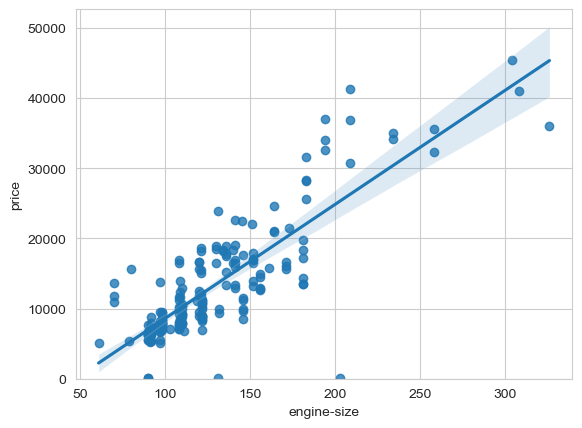

In [47]:
# Engine-size vs price 
# Engine-size as potential indicator for price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>


In [48]:
# We can examine the correlation between "engine-size" and price that comes out to be approximately 0.8
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.838501
price,0.838501,1.000000


<AxesSubplot:xlabel='highway-L/100km', ylabel='price'>

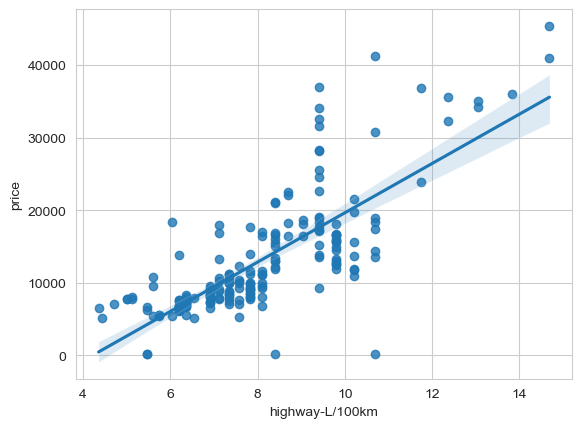

In [49]:
# Scatterplot for "highway-L/100km" vs "price"
sns.regplot(x="highway-L/100km", y="price", data=df)

In [50]:
df[["highway-L/100km", "price"]].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.778462
price,0.778462,1.000000


### Weak Linear Relationship

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

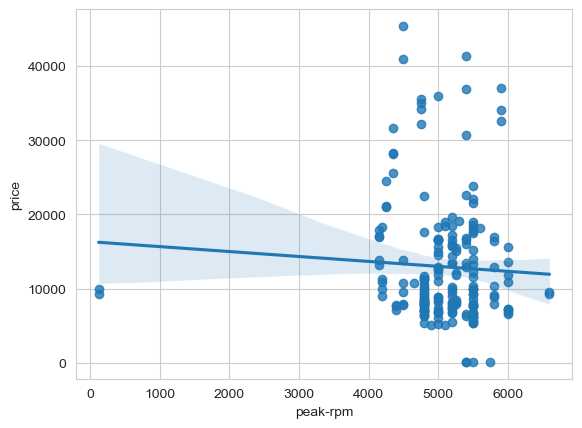

In [51]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [52]:
df[["peak-rpm", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.056506
price,-0.056506,1.000000


<AxesSubplot:xlabel='stroke', ylabel='price'>

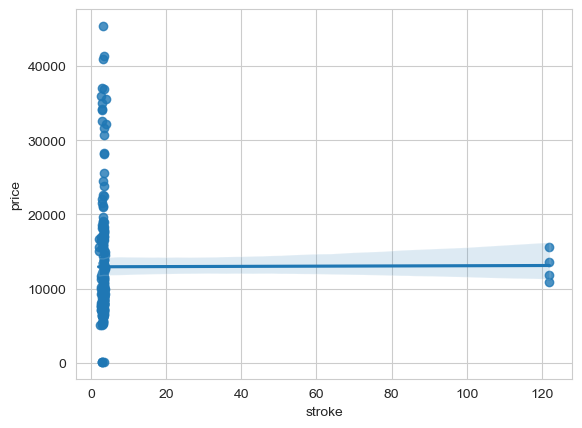

In [53]:
# Weak correlation shown between stroke and price
sns.regplot(x="stroke", y="price", data=df)

In [54]:
df[["stroke", "price"]].corr()

,stroke,price
stroke,1.000000,0.002916
price,0.002916,1.000000


### Categorical Variable

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

<AxesSubplot:xlabel='body-style', ylabel='price'>

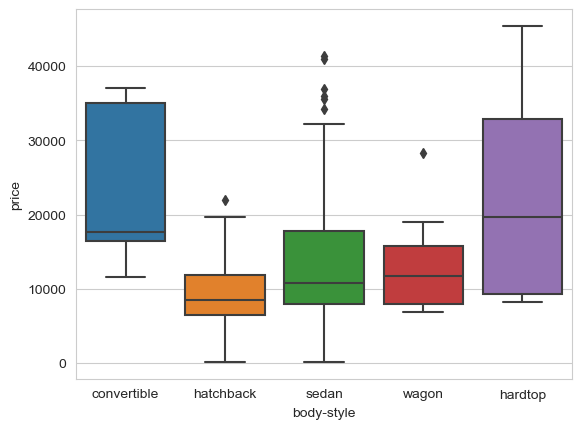

In [55]:
# Lets look at the relationship between "body-style" and price
sns.boxplot(x="body-style", y="price", data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price.

<AxesSubplot:xlabel='engine-location', ylabel='price'>

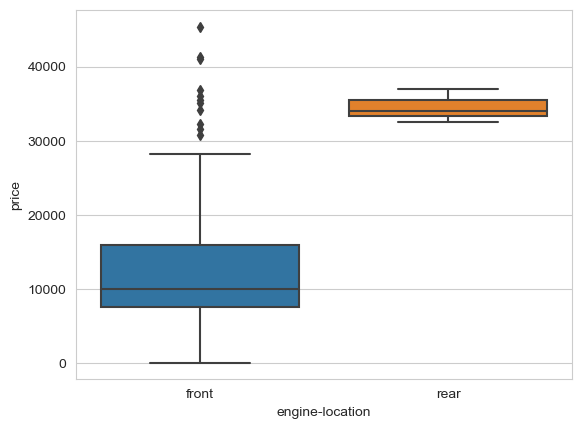

In [56]:
# Lets look at the relationship between engine-location and price
sns.boxplot(x="engine-location", y="price", data=df)

We can see there is a significant price difference for each type of engine location. Hence we can say engine location is a strong predictor for price of a car

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

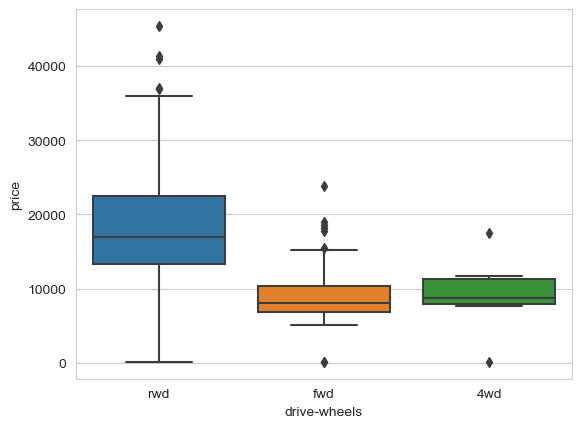

In [57]:
# Lets look at the relationship between drive-wheels and price
sns.boxplot(x="drive-wheels", y="price", data=df)

<p>Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.</p>


### Correlation and causation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


Sometimes we would like to know the significant of the correlation estimate.

<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


<h3>Wheel-Base vs. Price</h3>


Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.


In [58]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5836468062464035  with a P-value of P = 5.124974266615564e-20


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>


<h3>Horsepower vs. Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.


In [60]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.7016586271229237  with a P-value of P =  1.4608674607989272e-31


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).</p>


<h3>Length vs. Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.


In [62]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6856139518474091  with a P-value of P =  1.139301618722378e-29


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>


<h3>Width vs. Price</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':


In [64]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.6976217863264362  with a P-value of P = 4.491842684204453e-31


#### Conclusion

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (\~0.751).


### Curb-Weight vs. Price

Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':


In [65]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8001621508348715  with a P-value of P =  9.983606050796786e-47


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>


<h3>Engine-Size vs. Price</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':


In [68]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8385009405962764  with a P-value of P = 3.633691572367043e-55


<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>


<h3>Bore vs. Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'bore' and 'price':


In [69]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.009866268902386309  with a P-value of P =   0.8886157456374465


<h4>Conclusion:</h4>
<p>Since the p-value is > 0.1, the correlation between bore and price is statistically insignificant, and the linear relationship is only weak (~0.521).</p>


<h3>City-L/100km vs. Price</h3>


In [70]:
pearson_coef, p_value = stats.pearsonr(df['city-L/100km'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.7476532387065817  with a P-value of P =   9.185778286809499e-38


<h3>Highway-L/100km vs. Price</h3>


In [71]:
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.7784623324325549  with a P-value of P =   1.001920326562267e-42


# Conclusion

After performing above data analysis on our car data set we narrowed down our 25 predictors of theprice of a car to few predictors
that best affects the price of a car. They are:

<ol>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-L/100km</li>
    <li>Highway-L/100km</li>
    <li>Wheel-base</li>
</ol>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
</ul>